This notebook is the prelimilary preprocessing for the TTC Bus Delay raw data from the [City of Toronto Open Data Portal](https://open.toronto.ca/dataset/ttc-bus-delay-data/). The output of this script is the merging of all bus delays from January 2014 to August 2020, along with a few pre-processing. The output is exported to the bus/intermediate data directory to be used for Exploratory Data Analysis in the "eda.ipynb".

Special thanks to Patrickdg for providing a mapping to clean names of locations and direction. Check out his [Github repository](https://github.com/Patrickdg/TTC-Delay-Analysis) here.

# Import libraries, load paths

In [ ]:
# Import libraries
import os, sys
import json
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#from fuzzywuzzy import process
from tqdm import tqdm


In [ ]:
# Import files from google drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
# Load paths, replace with your own path if you're developing locally
master_path = '/content/gdrive/My Drive/ColabNtb/ttc_delay'
with open(os.path.join(master_path, 'data/paths.json'), 'r') as json_file:
  paths = json.load(json_file)

Mounted at /content/gdrive


# Glimpse of the data, preliminary processing

In [ ]:
# Import custom utility functions and Patrick's mappings
sys.path.append(paths['src'])
from utils import read_data_into_dataframe, one_dataframe, understand_dataframe, process_dataframe, make_time, join_date_time
import mappings

In [ ]:
os.listdir(paths['raw/bus'])

['ttc-bus-delay-data-readme.xlsx',
 'ttc-bus-delay-data-2014.xlsx',
 'ttc-bus-delay-data-2015.xlsx',
 'ttc-bus-delay-data-2016.xlsx',
 'ttc-bus-delay-data-2017.xlsx',
 'ttc-bus-delay-data-2018.xlsx',
 'ttc-bus-delay-data-2019.xlsx',
 'ttc-bus-delay-data-2020.xlsx']

In [ ]:
df_bus = one_dataframe(paths['raw/bus'])

[]
Excel sheets processed ...
['Jan 2014', 'Feb 2014', 'Mar 2014', 'Apr 2014', 'May 2014', 'June 2014', 'July 2014', 'Aug 2014', 'Sept 2014', 'Oct 2014', 'Nov 2014', 'Dec 2014']
['ttc-bus-delay-data-2014.xlsx']
Excel sheets processed ...
['Jan 2015', 'Feb 2015', 'Mar 2015', 'Apr 2015', 'May 2015', 'June 2015', 'July 2015', 'Aug 2015', 'Sept 2015', 'Oct 2015', 'Nov 2015', 'Dec 2015']
['ttc-bus-delay-data-2014.xlsx', 'ttc-bus-delay-data-2015.xlsx']
Excel sheets processed ...
['Jan 2016', 'Feb 2016', 'Mar 2016', 'Apr 2016', 'May 2016', 'Jun 2016', 'July 2016', 'Aug 2016', 'Sept 2016', 'Oct 2016 ', 'Nov 2016 ', 'Dec 2016']
['ttc-bus-delay-data-2014.xlsx', 'ttc-bus-delay-data-2015.xlsx', 'ttc-bus-delay-data-2016.xlsx']
Excel sheets processed ...
['Jan 2017 ', 'Feb 2017', 'Mar 2017', 'Apr 2017 ', 'May 2017', 'Jun 2017 ', 'July 2017  ', 'Aug 2017', 'Sept 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017']
['ttc-bus-delay-data-2014.xlsx', 'ttc-bus-delay-data-2015.xlsx', 'ttc-bus-delay-data-2016.xlsx', 

In [ ]:
understand_dataframe(df_bus)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479404 entries, 0 to 479403
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report Date  479404 non-null  datetime64[ns]
 1   Route        479404 non-null  int64         
 2   Time         479404 non-null  object        
 3   Day          479404 non-null  object        
 4   Location     478610 non-null  object        
 5   Incident     478469 non-null  object        
 6   Delay        478939 non-null  float64       
 7   Gap          478459 non-null  float64       
 8   Direction    468819 non-null  object        
 9   Vehicle      409516 non-null  float64       
 10  Incident ID  5144 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 40.2+ MB
None 
 ----------- 

There are 479404 rows and 11 columns. 
 ----------- 

There are 557872 missing values in the dataframe. 
 ----------- 

The number of un

In [ ]:
df_bus.sample(10)

,Report Date,Route,Time,Day,Location,Incident,Delay,Gap,Direction,Vehicle,Incident ID
78192,2014-10-25,53,11:55:00,Saturday,Finch Stn,Late Leaving Garage,6.0,12.0,NE,1071.0,NaN
316011,2017-12-21,45,19:00:00,Thursday,Kipling stn,Mechanical,11.0,22.0,N/B,8043.0,NaN
221865,2016-09-09,39,06:05:00,Friday,Finch Station,Late Leaving Garage,10.0,15.0,E,1770.0,NaN
272179,2017-05-21,113,11:45:00,Sunday,Kennedy and Eglinton,Diversion,20.0,57.0,NaN,NaN,NaN
54489,2014-07-22,92,15:50:00,Tuesday,Woodbine stn,Mechanical,7.0,14.0,S,7882.0,NaN
135016,2015-06-30,6,14:00:00,Tuesday,Entire Route,General Delay,11.0,22.0,B/W,NaN,NaN
167217,2015-12-11,7,12:25:00,Friday,Bathurst and Wilson,Mechanical,9.0,18.0,s/b,9045.0,NaN
429385,2019-07-17,44,06:01:00,Wednesday,Col Sam Smith Loop,Mechanical,6.0,13.0,N/B,7977.0,NaN
118263,2015-04-15,29,06:21:00,Wednesday,Princes Gate,Mechanical,7.0,14.0,n/b,9014.0,NaN
136424,2015-07-08,85,13:00:00,Wednesday,Don Mills Stn to Rouge Hill,General Delay,12.0,20.0,E/W,NaN,NaN


In [ ]:
df_bus['Time'].astype(str).apply(lambda x: x[-8:])

0         00:23:00
1         00:55:00
2         01:28:00
3         01:30:00
4         01:37:00
            ...   
479399    05:41:00
479400    06:32:00
479401    05:49:00
479402    06:10:00
479403    06:23:00
Name: Time, Length: 479404, dtype: object

In [ ]:
df_bus['Vehicle'] = df_bus['Vehicle'].fillna(0).astype(int)
df_bus = process_dataframe(df_bus,
                                num_cols=['Delay', 'Gap'],
                                cat_cols=['Route', 'Location', 'Incident', 'Direction', 'Vehicle', 'Day']).drop(['Incident ID'], axis=1)

In [ ]:
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479404 entries, 0 to 479403
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report Date  479404 non-null  datetime64[ns]
 1   Route        479404 non-null  category      
 2   Time         479404 non-null  object        
 3   Day          479404 non-null  category      
 4   Location     478610 non-null  category      
 5   Incident     478469 non-null  category      
 6   Delay        478939 non-null  float64       
 7   Gap          478459 non-null  float64       
 8   Direction    468819 non-null  category      
 9   Vehicle      479404 non-null  category      
dtypes: category(6), datetime64[ns](1), float64(2), object(1)
memory usage: 26.2+ MB


In [ ]:
df_bus['Time'] = df_bus['Time'].astype(str).apply(lambda x: x[-8:])

In [ ]:
df_bus = join_date_time(df_bus, 
                             date_col='Report Date',
                             time_col='Time')

In [ ]:
df_bus.head()

,Route,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime
0,95,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734,2014-01-01 00:23:00
1,102,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110,2014-01-01 00:55:00
2,54,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478,2014-01-01 01:28:00
3,112,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084,2014-01-01 01:30:00
4,24,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843,2014-01-01 01:37:00


In [ ]:
df_bus = make_time(df_bus, datetime_column='datetime')

In [ ]:
df_bus.head()

,Route,Day,Location,Incident,Delay,Gap,Direction,Vehicle,datetime,year,month,dayofweek,hour,date
0,95,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734,2014-01-01 00:23:00,2014,1,2,0,2014-01-01
1,102,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110,2014-01-01 00:55:00,2014,1,2,0,2014-01-01
2,54,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478,2014-01-01 01:28:00,2014,1,2,1,2014-01-01
3,112,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084,2014-01-01 01:30:00,2014,1,2,1,2014-01-01
4,24,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843,2014-01-01 01:37:00,2014,1,2,1,2014-01-01


# Data deep dive and more processing

### Direction

In [ ]:
df_bus.Direction.unique()

['E', 'b/w', 'WB', 'N', 'n', ..., '60', '70977', 'Roadwy', '3e', 'E/B18:52']
Length: 1188
Categories (1187, object): ['E', 'b/w', 'WB', 'N', ..., '70977', 'Roadwy', '3e', 'E/B18:52']

In [ ]:
mapping = mappings.bus_direction_map
df_bus.Direction = df_bus.Direction.str.lower()
for key in mapping.keys():
    for value in mapping[key]: 
       df_bus.Direction = df_bus.Direction.map(lambda x: str(x).replace(value, key))
df_bus.Direction = df_bus.Direction.map(lambda x: re.sub(r' +', ' ', str(x)))
no_bounds = df_bus.Direction.value_counts()[5:].index
df_bus.loc[df_bus['Direction'].isin(no_bounds), 'Direction'] = 'No Bound'

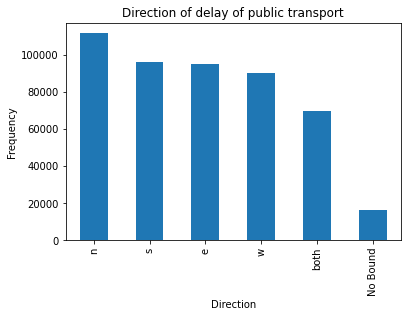

In [ ]:
df_bus.Direction.value_counts().plot(kind='bar')
plt.xlabel('Direction')
plt.ylabel('Frequency')
plt.title('Direction of delay of public transport')
plt.show()

### Min Delay, Gap

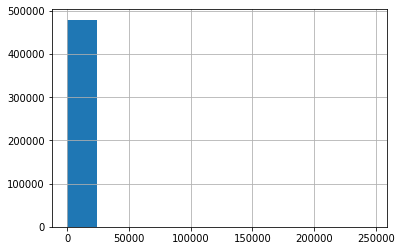

In [ ]:
df_bus['Delay'].hist()

In [ ]:
sum(df_bus['Delay'] > 60)/len(df_bus)

0.025625568414114192

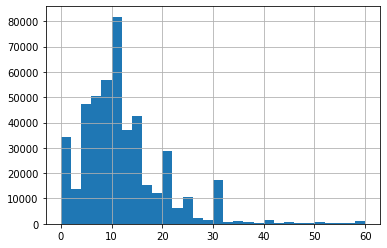

In [ ]:
df_bus[(df_bus['Delay'] <= 60) & (df_bus['Delay'] >= 0)]['Delay'].hist(bins=30)

In [ ]:
df_bus['Delay'] = [delay if delay >= 0 else 0 for delay in df_bus['Delay']]

In [ ]:
df_bus['Delay'] = [delay if delay <= 60 else 60 for delay in df_bus['Delay']]

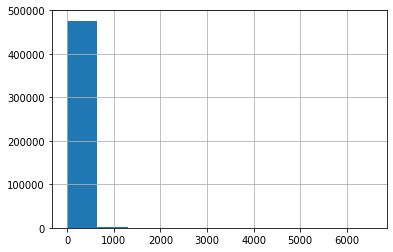

In [ ]:
df_bus['Gap'].hist()

In [ ]:
sum(df_bus['Gap'] > 60)/len(df_bus)

0.035418978565051606

In [ ]:
df_bus['Gap'] = [gap if gap <= 60 else 60 for gap in df_bus['Gap']]

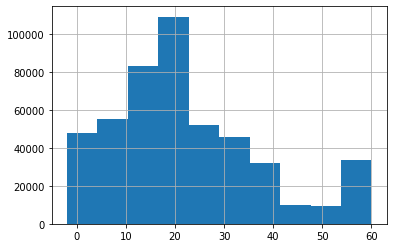

In [ ]:
df_bus['Gap'].hist()

### Incident

In [ ]:
df_bus.Incident.value_counts()

Mechanical                          178752
Utilized Off Route                   77966
General Delay                        66737
Late Leaving Garage                  65447
Investigation                        46224
Diversion                            28299
Emergency Services                    9895
Late Leaving Garage - Mechanical      1889
Late Leaving Garage - Operator        1788
Vision                                 788
Late Leaving Garage - Management       490
Late Leaving Garage - Vision           169
Management                              25
Name: Incident, dtype: int64

In [ ]:
df_bus['Incident'] = df_bus.Incident.str.replace('Late Leaving Garage - ', '')

### Location

In [ ]:
# Import polyfuzz for string matching.
from polyfuzz import PolyFuzz
from polyfuzz.models import RapidFuzz
from rapidfuzz import process
from rapidfuzz import fuzz

In [ ]:
mapping = mappings.bus_locations_mapping
df_bus.Location = df_bus.Location.str.lower()
for key in mapping.keys():
    for value in mapping[key]: 
       df_bus.Location = df_bus.Location.map(lambda x: str(x).replace(value, key))
df_bus.Location = df_bus.Location.map(lambda x: re.sub(r' +', ' ', str(x)))

In [ ]:
def combine_locations(loc_series, folds, fold_quantile, score_cutoff):
  """ This function attempts to reduce the by location count by matching rare location records (which is probably typo) to the nearest acceptable popular locations.
  It is done by folding the series by the value count at the specified percentile multiple times to reduce the number of unique locations.
  ARG:
    loc_series (pd.Series) - The series which contain all the locations.
    folds (int) - The number of folds to make. Each fold the series at the specified percentile by finding closest matching strings in the higher percentile.
    fold_quantile (float) - Between 0-1. The quantile to fold at. The lower the quantile, the more folds are needed but the more accurate the result may be.
    score_cutoff (int) - Between 0-100. The similarity cutoff to match strings. The lower the cutoff, the more possibly strings will be matched with those not so closely related.
  RETURN:
    The modified series with less unique locations."""

  # Initialize hash table to store no matches
  no_match = []

  # For every fold, do the folding algorithm to find matches
  for fold in range(folds):

    # Initialize value count for values not in the no_match dictionary
    counts = loc_series[~loc_series.isin(no_match)].value_counts()

    # Get the head and tail of the series according to quantile specified
    quantile_value = counts.quantile(fold_quantile)
    head = counts[counts > quantile_value]
    tail = counts[counts <= quantile_value]

    # For every tail locations (low counts), map it with the closest head location
    for location in tqdm(tail.index):
      #print('\n')
      #print(f'query location: {location}')
      best_match = process.extractOne(location, head.index, score_cutoff=score_cutoff)
      #print(f'best match: {best_match}')

      # If there are no head location above matching threshold, map the tail location to itself
      if best_match == None:
        no_match.append(location)
      
      # If there are similar head location, map it to that location
      else:
        loc_series = loc_series.replace(location, best_match[0])

  return loc_series

In [ ]:
new_loc = combine_locations(df_bus.Location,
                            folds=5,
                            fold_quantile=0.2,
                            score_cutoff=80)

100%|██████████| 2037/2037 [01:14<00:00, 27.45it/s]


In [ ]:
df_bus['Location_combined'] = new_loc

In [ ]:
df_bus.to_csv(os.path.join(paths['intermediate/bus'], 'bus.csv'))